In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
import collections
from random import shuffle
import matplotlib
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix



import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
cd "/content/gdrive/My Drive/NN"

/content/gdrive/My Drive/NN


**Read the data**

In [0]:
fname='semeion.data'

file = open(fname, 'r')
lines = file.readlines()

width = 16
height = 16
size = width * height
classes = 10

images = [];
labels = [];
fnumber = 0;

**Save image in local**

In [0]:
def save(fname, data, width, height):
	image = np.array(data).reshape(width, height)
	matplotlib.pyplot.imsave(fname, image, cmap=matplotlib.cm.gray)

In [0]:
	for line in lines:
		data = line.split(' ')
		image = [];
		label = [];

		for i in range(0, size):
			image.append(int(float(data[i])))
		images.append(image)
		
		for i in range(size, size + classes):
			label.append(int(float(data[i]))) 
		labels.append(label)
  
		fnumber += 1
		if fnumber < 10:
			#image_utils.show(image, width, height)
			save('/content/gdrive/My Drive/NN/'+str(fnumber) + '.png', image, width, height)

Now that we have an clear idea of how the image looks like, moving on with data processing..

In [0]:
data = pd.read_csv('semeion.data',sep=" ",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,NaN


In [0]:
X = data.iloc[:,0:size]
y = data.iloc[:,size:size+classes]
print(X.shape)
print(y.shape)

(1593, 256)
(1593, 10)


In [0]:
y=y[y.columns].replace(0, 0.1)
y=y[y.columns].replace(1, 0.9)

Converting 0 to 0.1 and 1 to 0.99 

In [0]:
y

,256,257,258,259,260,261,262,263,264,265
0,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...
1588,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.9
1589,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.9
1590,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.9
1591,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.9


**Modelling**

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.keras import optimizers, metrics
from sklearn.metrics import confusion_matrix

In [0]:
def model_run(num):
  # num is the number of neurons in the hiddenlayer
  # build the neural network
  classifier = Sequential()

  # The input layer requires input_shape parameter which should match the shape of our training data.
  #Hidden layer
  classifier.add(Dense(units=num, activation='sigmoid', input_shape=(size,),use_bias=True,bias_initializer='ones'))

  #Outout layer
  classifier.add(Dense(units=classes, activation='sigmoid',use_bias=True,bias_initializer='ones'))

  Sgd = optimizers.SGD(lr=0.1)
  classifier.compile(optimizer=Sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  classifier.summary()

  return classifier

In [0]:
def plot_graph(classifier,num):

  model= classifier.fit(X_train, y_train, epochs=50, verbose=False, validation_data=(X_test, y_test))
  loss_train,accuracy_train = classifier.evaluate(X_train, y_train, verbose=False)
  loss, accuracy  = classifier.evaluate(X_test, y_test, verbose=False)

  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('model accuracy n= %d'%num)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['training', 'test'], loc='best')

  plt.show()

  print(f'Test loss : {loss:.5}')
  print(f'Train accuracy : {accuracy_train:.5}') 
  print(f'Test accuracy : {accuracy:.5}')

  return model

In [0]:
def conf_matrix(model,X_test,y_test,num):
  digits=[0,1,2,3,4,5,6,7,8,9]

  y_test_pred = model.predict(X_test)
  cm = confusion_matrix(np.argmax(np.array(y_test),axis=1),np.argmax(y_test_pred,axis=1) )

  
  sns.heatmap(cm, annot=True,xticklabels=digits, yticklabels=digits,cmap="Blues",fmt = ".0f")
  plt.title('n = %d'%num)
  plt.ylabel('Prediction')
  plt.xlabel('Actual')

In [0]:
#Split model into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Question 1**

a)

**For n=20**

In [0]:
num=20
classifier=model_run(num)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                5140      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


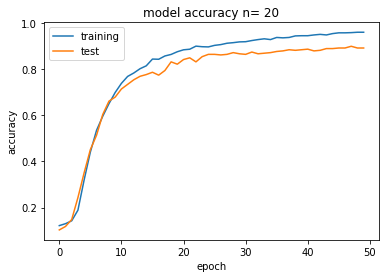

Test loss : 3.4617
Train accuracy : 0.95896
Test accuracy : 0.89223


In [0]:
model=plot_graph(classifier,num)

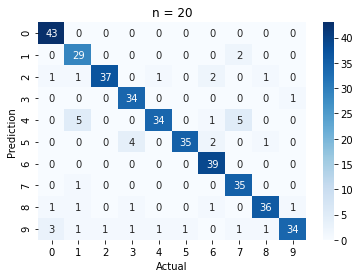

In [0]:
conf_matrix(classifier,X_test,y_test,num)

**For n=50**

In [0]:
num=50
classifier=model_run(num)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                510       
Total params: 13,360
Trainable params: 13,360
Non-trainable params: 0
_________________________________________________________________


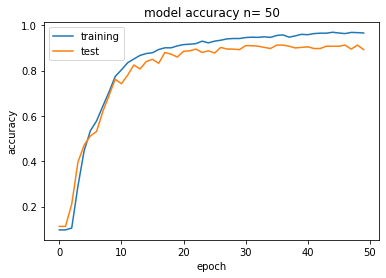

Test loss : 3.4595
Train accuracy : 0.96315
Test accuracy : 0.89223


In [0]:
model=plot_graph(classifier,num)

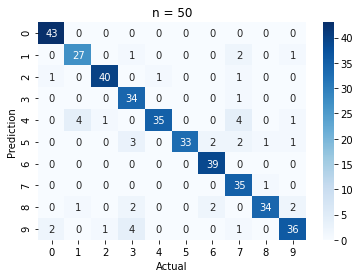

In [0]:
conf_matrix(classifier,X_test,y_test,num)

**For n=100**

In [0]:
num=100
classifier=model_run(num)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


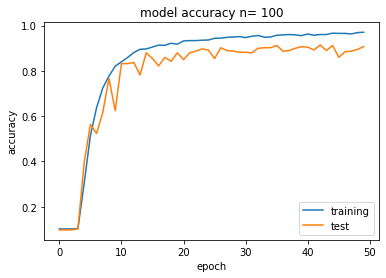

Test loss : 3.4683
Train accuracy : 0.96901
Test accuracy : 0.90727


In [0]:
model=plot_graph(classifier,num)

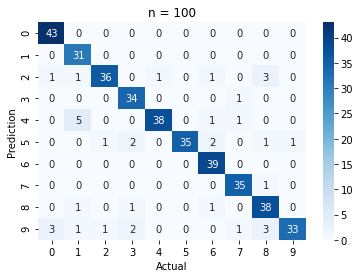

In [0]:
conf_matrix(classifier,X_test,y_test,num)

**b)** The train and test accuracy for each epoch has been plotted above 

**c)** Higher the hidden units more the accuracy of the training model.But the accuracy of the test data has increased only marginally in case of 50 and 100 and hence it seems to be overfitting the model

**d)** For n=50 and 100, the number of epoch for high validation score is approximately around 15.There is not much difference in epoch among the two.But For n=20 it is more than 20 epoch to get high validation score. Hence generally we can say that epoch reuired will be less as hidden units increases but we can't always ascertain this.Its a trail and error strategy

**e)** Yes in n=50 and 100, we can observe that after certain number of epoch the validation curve seems to saturate. The train accuracy is around 96% but the test accuracy increases by a very marginal amount.

**Question 2**

a) Training data is 25%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0,stratify=y)

Checking if the training data is balanced

In [0]:
sum(np.array(y))*100/len(y)

array([18.08537351, 18.13559322, 17.98493409, 17.98493409, 18.08537351,
       17.98493409, 18.08537351, 17.93471438, 17.78405524, 17.93471438])

In [0]:
num=100
classifier=model_run(num)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


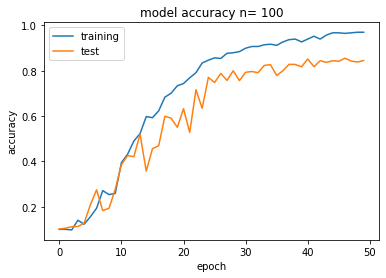

Test loss : 3.5531
Train accuracy : 0.96482
Test accuracy : 0.84519


In [0]:
model=plot_graph(classifier,num)

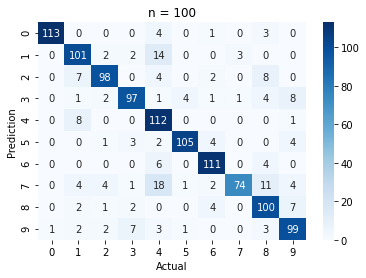

In [0]:
conf_matrix(classifier,X_test,y_test,num)

 Training data is 50%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0,stratify=y)

In [0]:
sum(np.array(y))*100/len(y)

array([18.08537351, 18.13559322, 17.98493409, 17.98493409, 18.08537351,
       17.98493409, 18.08537351, 17.93471438, 17.78405524, 17.93471438])

In [0]:
num=100
classifier=model_run(num)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


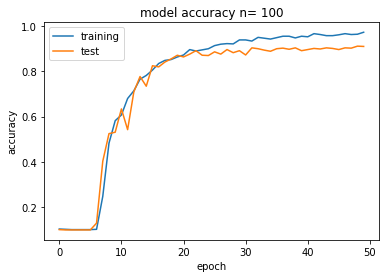

Test loss : 3.4784
Train accuracy : 0.97487
Test accuracy : 0.90966


In [0]:
model=plot_graph(classifier,num)

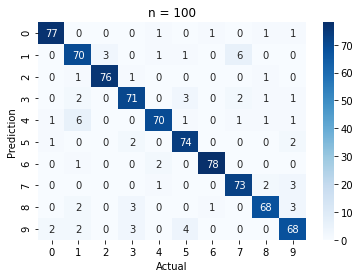

In [0]:
conf_matrix(classifier,X_test,y_test,num)

**b)** The graphs have been plotted above

**c)** In the first case we had only 25% data for train and second one we tried with 50% data.The accuracy scores on the test data obtained was 84% and 90% respectively.Hence we can establish that good amount of training data is required for model to learn the variations in the data but it should also be seen that we don't overfit the model.

**d)** In the first case, the number of epoch required to attain a good validation score is roughly around 30 but for the other scenario where 50% of the data was used for training, the number of epoch required to get a good score was around 20. Hence with more data, less epochs will be required to attain to good validation score

**e)** In the second case, we can observe that train score is very high around 98% but the test score is just around 90%. It is overfitting on the training data and not able to explain much variation in test comparetively.

**Question 3**

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
def create_model(optimizer='rmsprop',units=100,activation='sigmoid',loss='binary_crossentropy'):
    model1 = Sequential()
    model1.add(Dense(units=units, activation=activation, input_shape=(size,),use_bias=True,bias_initializer='ones'))

    #Outout layer
    model1.add(Dense(units=classes, activation=activation,use_bias=True,bias_initializer='ones'))
    model1.compile(loss=loss, optimizer=optimizer, metrics=['acc']) 

    return model1

In [0]:
from sklearn.utils import shuffle
X, Y = shuffle(X, y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [0]:
model1 = KerasClassifier(build_fn=create_model)

optimizers = ['rmsprop', 'adam','SGD']
activation = ['softmax','sigmoid']
units = [50,100]
loss = ['binary_crossentropy', 'categorical_hinge', 'categorical_crossentropy']

param_grid = dict(optimizer=optimizers, units=units,activation=activation,loss=loss)

grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

**Try that params**

In [0]:
    model1 = Sequential()
    model1.add(Dense(units=100, activation='sigmoid', input_shape=(size,),use_bias=True,bias_initializer='ones'))

    #Outout layer
    adam = tf.optimizers.SGD(lr = 0.01)
    model1.add(Dense(units=classes, activation='sigmoid',use_bias=True,bias_initializer='ones'))
    model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc']) 

In [0]:
  loss_train,accuracy_train = model1.evaluate(X_train, y_train, verbose=False)
  loss, accuracy  = model1.evaluate(X_test, y_test, verbose=False)

In [0]:
accuracy_train,accuracy

(0.0914798229932785, 0.11297070980072021)

**Trail 2**

In [0]:
  classifier2 = Sequential()

  # The input layer requires input_shape parameter which should match the shape of our training data.
  #Hidden layer
  classifier2.add(Dense(units=100, activation='sigmoid', input_shape=(size,),use_bias=True,bias_initializer='ones'))

  #Outout layer
  classifier2.add(Dense(units=classes, activation='softmax',use_bias=True,bias_initializer='ones'))

  Sgd = tf.optimizers.Adam(lr=0.01)
  classifier2.compile(optimizer=Sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model2= classifier2.fit(X_train, y_train, epochs=75, verbose=False, validation_data=(X_test, y_test))

In [0]:
  loss_train,accuracy_train = classifier2.evaluate(X_train, y_train, verbose=False)
  loss, accuracy  = classifier2.evaluate(X_test, y_test, verbose=False)

In [0]:
accuracy_train,accuracy

(1.0, 0.9330543875694275)

We can observe that after much trails with gridsearchcv and various parameters,the highest accuracy attained so far in test is 93.3% which is higher than the 90% accuracy on test data obtained earlier.